<a href="https://colab.research.google.com/github/anjali-mi/AI-ML_assignment/blob/main/1_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output

from sklearn.model_selection import train_test_split

# Create Synth Data

In [ ]:
np.random.seed(0)
x_train = 2 * np.random.rand(300, 1)
y_train = 1 + 3 * x_train # + np.random.randn(300, 1)

# Plot Data

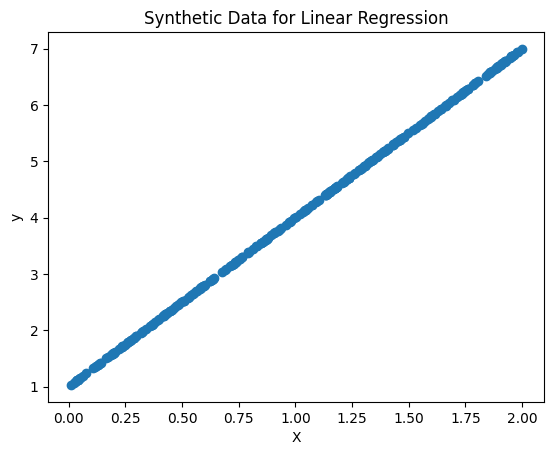

In [ ]:
plt.scatter(x_train, y_train)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data for Linear Regression')
plt.show()


# Define Loss function

In [ ]:
def error_function(y_true, y_predicted):

    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    # cost = np.sum(np.abs(y_true - y_predicted)) / len(y_true)
    return cost

# Implement Gradient Descent

### Mean Squared Error (MSE)

1. **MSE Loss Function**:

   $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

   where \( \hat{y}_i = wx_i + b \).

2. **Derivative with respect to weight \( w \)**:

   $$ \frac{\partial \text{MSE}}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)x_i = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)x_i $$

3. **Derivative with respect to bias \( b \)**:

   $$ \frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) $$

### Mean Absolute Error (MAE)

1. **MAE Loss Function**:

   $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

2. **Derivative with respect to weight \( w \)**:

   $$ \frac{\partial \text{MAE}}{\partial w} = -\frac{1}{n} \sum_{i=1}^{n} \text{sign}(y_i - \hat{y}_i) \cdot x_i $$

3. **Derivative with respect to bias \( b \)**:

   $$ \frac{\partial \text{MAE}}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} \text{sign}(y_i - \hat{y}_i) $$

Where:
- \( \text{sign}(z) \) is a function that returns \(1\) if \(z > 0\), \(-1\) if \(z < 0\), and \(0\) if \(z = 0\).
- \( y_i \) is the true value.
- \( \hat{y}_i \) is the predicted value, computed as \( \hat{y}_i = wx_i + b \).
- \( x_i \) is the input feature value.
- \( n \) is the number of data points.


In [ ]:
def gradient_descent(x, y, iterations=1000, learning_rate=0.001, stopping_threshold=1e-6):
    current_weight = 2
    current_bias = 3
    n = float(len(x))

    costs = []
    weights = []
    biases = []
    previous_cost = None

    for i in range(iterations):
        y_predicted = (current_weight * x) + current_bias
        current_cost = error_function(y, y_predicted)

        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break

        previous_cost = current_cost
        costs.append(current_cost)
        weights.append(current_weight)
        biases.append(current_bias)

        weight_derivative = -(2/n) * np.sum(x * (y - y_predicted))
        bias_derivative = -(2/n) * np.sum(y - y_predicted)

        # weight_derivative = -np.mean(x * np.sign(y - y_predicted))
        # bias_derivative = -np.mean(np.sign(y - y_predicted))

        current_weight = current_weight - (learning_rate * weight_derivative)
        # current_weight = current_weight
        current_bias = current_bias - (learning_rate * bias_derivative)
        # current_bias = current_bias

    return weights, biases, costs

# Plot Cost Function

In [ ]:
iterations = 500

learning_rate = 0.05

In [ ]:
%matplotlib tk

In [ ]:
weights, biases, costs = gradient_descent(x_train, y_train, iterations, learning_rate)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 18))

# Plotting the data points and fit line
scatter = ax1.scatter(x_train, y_train, marker='o', color='red')
line, = ax1.plot(x_train, x_train * weights[0] + biases[0], color='blue', linestyle='dashed')
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_title("Data Points and Fit Line")

# Plotting the cost curve
cost_line, = ax2.plot([], [], color='green')
ax2.set_xlim(0, len(costs))
ax2.set_ylim(0, max(costs))
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Cost")
ax2.set_title("Cost Curve")

# Plotting Costs vs. Weights
weight_cost_line, = ax3.plot([], [], color='purple', linestyle='-')
ax3.set_xlim(min(weights), max(weights))
ax3.set_ylim(0, max(costs))
ax3.set_xlabel("Weights")
ax3.set_ylabel("Cost")
ax3.set_title("Costs vs. Weights")

# Plotting Costs vs. Biases
bias_cost_line, = ax4.plot([], [], color='orange', linestyle='-')
ax4.set_xlim(min(biases), max(biases))
ax4.set_ylim(0, max(costs))
ax4.set_xlabel("Biases")
ax4.set_ylabel("Cost")
ax4.set_title("Costs vs. Biases")

# Animation function
def update(frame):
    # Update line fitting
    current_weight = weights[frame]
    current_bias = biases[frame]
    y_pred = current_weight * x_train + current_bias
    line.set_ydata(y_pred)

    # Update cost curve
    cost_line.set_data(range(frame + 1), costs[:frame + 1])

    # Update Costs vs. Weights
    weight_cost_line.set_data(weights[:frame + 1], costs[:frame + 1])

    # Update Costs vs. Biases
    bias_cost_line.set_data(biases[:frame + 1], costs[:frame + 1])

    return line, cost_line, weight_cost_line, bias_cost_line

# Create animation
ani = FuncAnimation(fig, update, frames=len(weights), blit=False, interval=200)

plt.tight_layout()
plt.show()

In [ ]:
%matplotlib inline

# Check Best Indexes

In [ ]:
best_index = np.argmin(costs)
print("The best weight Iteration", best_index)

best_model = {}

best_model['coef_'] = weights[best_index]
best_model['intercept_'] =biases[best_index]

print(best_model)

print(f"Best Weight: {best_model['coef_']} Best Bias: {best_model['intercept_']}")

The best weight Iteration 325
{'coef_': 2.990698135272862, 'intercept_': 1.011060134631946}
Best Weight: 2.990698135272862 Best Bias: 1.011060134631946


# Check Latest Indexes

In [ ]:
print("Latest Index", len(costs) - 1)

latest_model = {}

latest_model['coef_'] = weights[-1]
latest_model['intercept_'] =biases[-1]

print(latest_model)

print(f"Latest Weight: {latest_model['coef_']} Best Bias: {latest_model['intercept_']}")

Latest Index 325
{'coef_': 2.990698135272862, 'intercept_': 1.011060134631946}
Latest Weight: 2.990698135272862 Best Bias: 1.011060134631946


# Plot

In [ ]:
%matplotlib inline

In [ ]:
plt.title("Best Index")
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x_train,y_train,c='b')
plt.plot(x_train,weights[best_index]*x_train + biases[best_index],c='g')

In [ ]:
plt.title("X")
plt.xlabel('Y')
plt.ylabel('Salary')
plt.scatter(x_train,y_train,c='b')
plt.plot(x_train,weights[-1]*x_train + biases[-1],c='g')